# 第十次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## 代码实践教材中的旋转矩阵

In [1]:
from skimage import io
import numpy as np
from numpy import newaxis
import math
import matplotlib.pyplot as plt

(-0.5, 499.5, 499.5, -0.5)

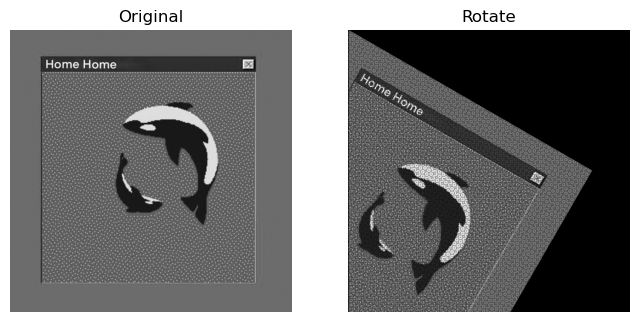

In [2]:
img=io.imread('img.png',as_gray=True)
ang=-30 # 旋转矩阵旋转方向为逆时针（negative for clockwise），设旋转角度为-30度

def sin(x):
    return math.sin(math.radians(x))
def cos(x):
    return math.cos(math.radians(x))

r_matrix=np.array([[cos(ang),sin(ang),0],
                   [-sin(ang),cos(ang),0],
                   [0,0,1]]) # 旋转矩阵

img_r=np.zeros(img.shape)

for m in range(img.shape[0]):
    for n in range(img.shape[1]):
        rotate_temp=np.matmul(np.array([m,n,1]),r_matrix) # 逐个像素右乘旋转矩阵
        m_temp=int(rotate_temp[0])
        n_temp=int(rotate_temp[1])
        if 0<m_temp<img_r.shape[0] and 0<n_temp<img_r.shape[1]:
            img_r[m_temp,n_temp]=img[m][n]

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_r,cmap='gray')
plt.title('Rotate')
plt.axis('off')

## 解释旋转矩阵原理，拓展教材矩阵

如下图左一，图像以左上角为原点，以逆时针为正方向旋转。设原点为$O$，图像顺时针旋转$\alpha$度，旋转前图像像素位置为$(v,w)$，旋转后像素位置为$(x,y)$。根据平面几何知识可得到等式：
$$
x=cos\alpha(v-wtan\alpha)
$$
即
$$
x=vcos\alpha-wsin\alpha
$$
又因为
$$
x^2+y^2=v^2+w^2
$$
得
$$
y=vsin\alpha+wcos\alpha
$$
因此，当图像以左上角为原点旋转时，旋转前与旋转后的像素点对应关系为
$$
\begin{cases}x=vcos\alpha-wsin\alpha \\ y=vsin\alpha+wcos\alpha \end{cases}
$$
写做齐次方程的矩阵形式为
$$
\begin{bmatrix}
x & y & 1
\end{bmatrix}
=
\begin{bmatrix}
v & w & 1
\end{bmatrix}
\begin{bmatrix}
cos\alpha & sin\alpha & 0 \\
-sin\alpha & cos\alpha & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

在上述讨论中我们明晰了以原点为圆心的旋转矩阵，但当我们不想以原点为圆心时呢？如图，当我们以任一点$P$旋转时，旋转矩阵该怎样设置呢？

(-0.5, 1499.5, 1874.5, -0.5)

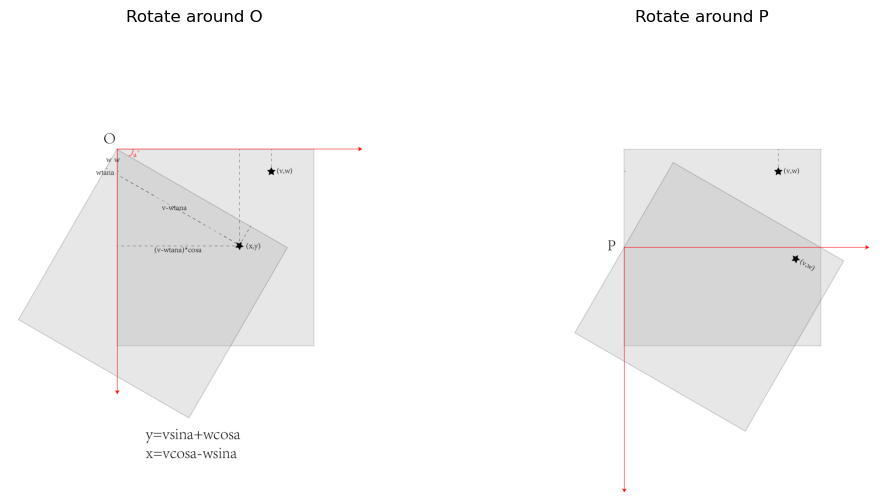

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(121)
img_2=io.imread('diagram/1.png')
plt.imshow(img_2)
plt.title('Rotate around O')
plt.axis('off')
plt.subplot(122)
img_2=io.imread('diagram/2.png')
plt.imshow(img_2)
plt.title('Rotate around P')
plt.axis('off')

通过查阅资料加自主思考，我认为可以通过以下三步来实现。设以$P(p,q)$为圆心旋转$\alpha$度，首先将点$P$移至圆心，即右乘位移矩阵$T_1$
$$
T_1=\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
-p & -q & 1
\end{bmatrix}
$$
再以原点为圆心旋转$\theta$度，即右乘旋转矩阵$R$
$$
R=\begin{bmatrix}
cos\alpha & sin\alpha & 0 \\
-sin\alpha & cos\alpha & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
最后将点$P$的位置还原，即右乘位移矩阵$T_2$
$$
T_2=\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
p & q & 1
\end{bmatrix}
$$
通过这三步变换就可以实现任意圆心的旋转。将它们结合，方程为：
$$
\begin{bmatrix}
x & y & 1
\end{bmatrix}
=
\begin{bmatrix}
v & w & 1
\end{bmatrix}
T_1\ast R\ast T_2 \\
=
\begin{bmatrix}
v & w & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
-p & -q & 1
\end{bmatrix}
\begin{bmatrix}
cos\alpha & sin\alpha & 0 \\
-sin\alpha & cos\alpha & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
p & q & 1
\end{bmatrix} \\
=
\begin{bmatrix}
v & w & 1
\end{bmatrix}
\begin{bmatrix}
cos\alpha & -sin\alpha & -pcos\alpha+qsin\alpha +p \\
sin\alpha & cos\alpha & -psin\alpha-qcos\alpha +q \\
0 & 0 & 1
\end{bmatrix}
$$

(-0.5, 1499.5, 1874.5, -0.5)

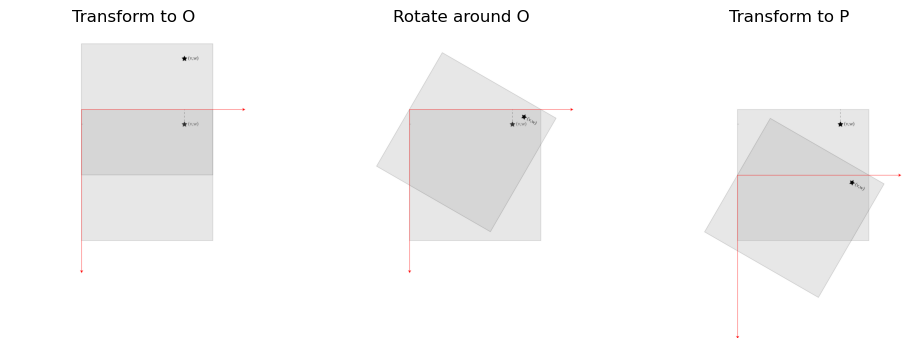

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(131)
img_2=io.imread('diagram/3.png')
plt.imshow(img_2)
plt.title('Transform to O')
plt.axis('off')
plt.subplot(132)
img_2=io.imread('diagram/4.png')
plt.imshow(img_2)
plt.title('Rotate around O')
plt.axis('off')
plt.subplot(133)
img_2=io.imread('diagram/5.png')
plt.imshow(img_2)
plt.title('Transform to P')
plt.axis('off')

## 代码实践教材中的旋转矩阵

(-0.5, 499.5, 499.5, -0.5)

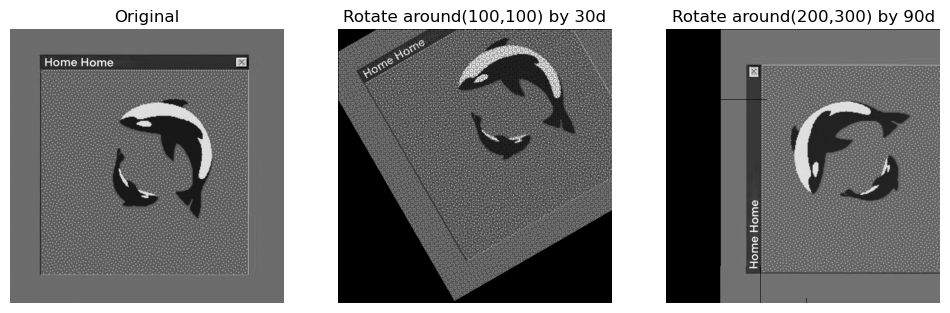

In [5]:
def r_matrix_anypoint(img,a,p,q):
    t_matrix_1=np.array([[1,0,0],
                         [0,1,0],
                         [-p,-q,1]]) # 位移矩阵1
    r_matrix=np.array([[cos(a),sin(a),0],
                       [-sin(a),cos(a),0],
                       [0,0,1]]) # 旋转矩阵
    t_matrix_2=np.array([[1,0,0],
                         [0,1,0],
                         [p,q,1]]) # 位移矩阵2
    img_r=np.zeros(img.shape)

    for m in range(img.shape[0]):
        for n in range(img.shape[1]):
            a_temp=np.matmul(np.matmul(np.matmul(np.array([m,n,1]),t_matrix_1),r_matrix),t_matrix_2) # 依次右乘
            m_temp=int(a_temp[0])
            n_temp=int(a_temp[1])
            if 0<m_temp<img_r.shape[0] and 0<n_temp<img_r.shape[1]:
                img_r[m_temp,n_temp]=img[m][n]
    return img_r

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(r_matrix_anypoint(img,30,100,100),cmap='gray')
plt.title('Rotate around(100,100) by 30d')
plt.axis('off')
plt.subplot(133)
plt.imshow(r_matrix_anypoint(img,90,200,300),cmap='gray')
plt.title('Rotate around(200,300) by 90d')
plt.axis('off')